In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 

In [117]:
os.getcwd()

'/Users/wongrachel/Desktop'

In [118]:
os.chdir('/Users/wongrachel/Desktop')

In [119]:
#download titanic data
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
#check class of every column
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [210]:
# change dtype
titanic_df = titanic_df.astype({"Survived":'category', "Sex":'category', "Pclass":'category'})

In [226]:
#check and remove NA
titanic_df_dropna = titanic_df.dropna()
pd.DataFrame(titanic_df_dropna)
titanic_df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  183 non-null    int64   
 1   Survived     183 non-null    category
 2   Pclass       183 non-null    category
 3   Name         183 non-null    object  
 4   Sex          183 non-null    category
 5   Age          183 non-null    float64 
 6   SibSp        183 non-null    int64   
 7   Parch        183 non-null    int64   
 8   Ticket       183 non-null    object  
 9   Fare         183 non-null    float64 
 10  Cabin        183 non-null    object  
 11  Embarked     183 non-null    object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 15.2+ KB


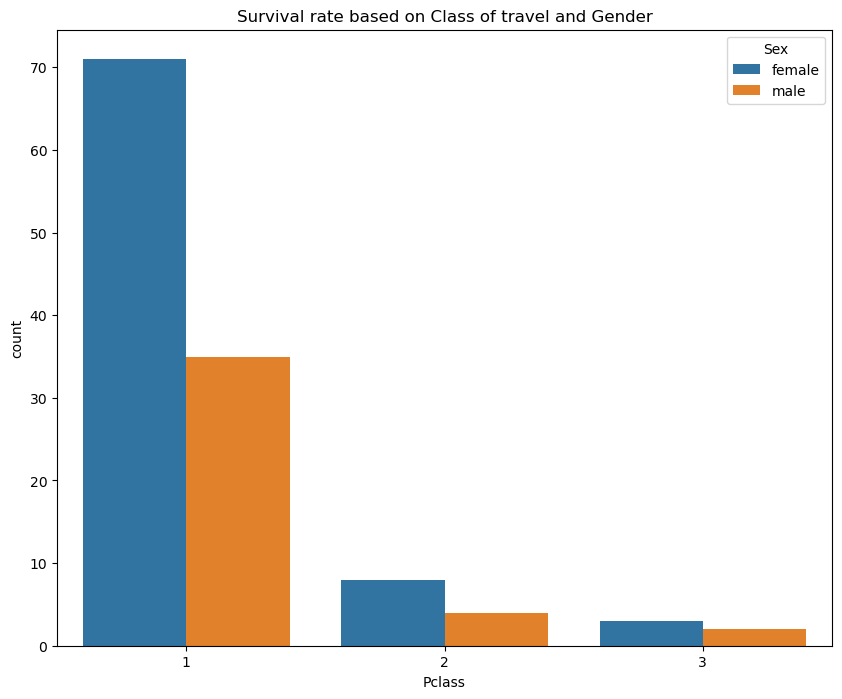

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  183 non-null    int64   
 1   Survived     183 non-null    category
 2   Pclass       183 non-null    category
 3   Name         183 non-null    object  
 4   Sex          183 non-null    category
 5   Age          183 non-null    float64 
 6   SibSp        183 non-null    int64   
 7   Parch        183 non-null    int64   
 8   Ticket       183 non-null    object  
 9   Fare         183 non-null    float64 
 10  Cabin        183 non-null    object  
 11  Embarked     183 non-null    object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 15.2+ KB


In [233]:
#a series of bar chart to show gender, ticket class and survival of the passengers onboard
titanic_survived = titanic_df_dropna.loc[titanic_df_dropna['Survived']==1]

plt.figure(figsize=(10,8))
sns.countplot(data=titanic_survived, x='Pclass',hue='Sex')
plt.title('Survival rate based on Class of travel and Gender')
plt.show()

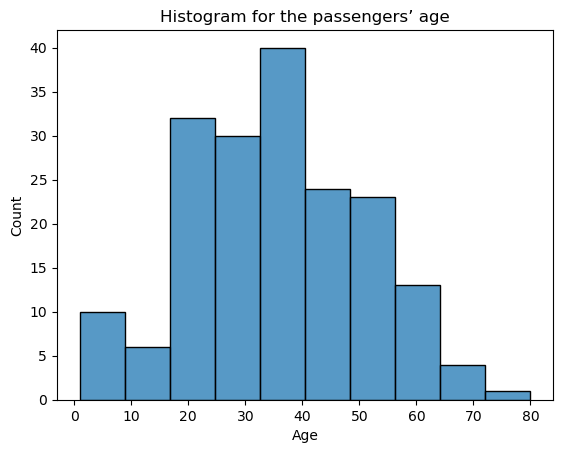

In [188]:
# Generate a histogram for the passengers’ age

sns.histplot(titanic_df_dropna['Age'])
plt.title('Histogram for the passengers’ age')
plt.show()


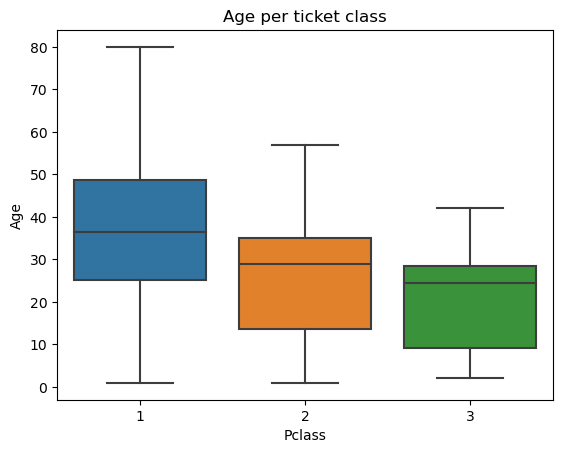

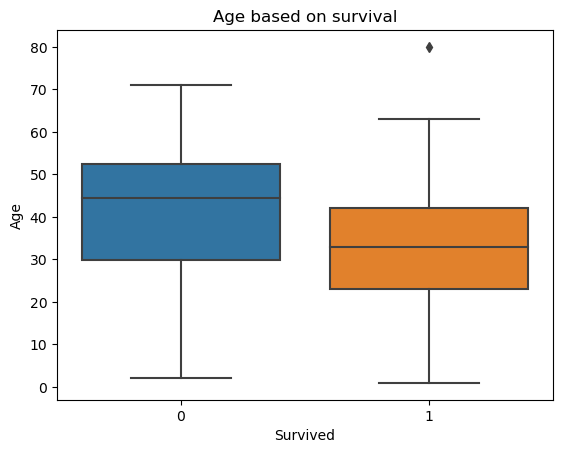

In [183]:
# describe the passengers’ age using the following two boxplots: age per ticket class and age based on survival

sns.boxplot(data=titanic_df_dropna, x= 'Pclass', y = 'Age')
plt.title('Age per ticket class')
plt.show()

sns.boxplot(data=titanic_df_dropna, x= 'Survived', y = 'Age')
plt.title('Age based on survival')
plt.show()

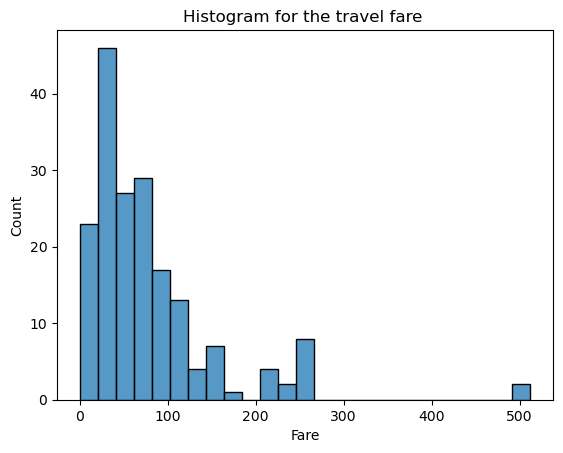

In [174]:
#Generate a histogram for the travel fare and a table showing the number of people who did not pay

sns.histplot(data=titanic_df_dropna, x= 'Fare')
plt.title('Histogram for the travel fare ')
plt.show()


In [175]:
from tabulate import tabulate

no_pay = titanic_df_dropna[titanic_df_dropna['Fare'] == 0]
print(tabulate(no_pay))

---  ---  -  -  ----------------------  ----  --  -  -  ------  -  ---  -
263  264  0  1  Harrison, Mr. William   male  40  0  0  112059  0  B94  S
806  807  0  1  Andrews, Mr. Thomas Jr  male  39  0  0  112050  0  A36  S
---  ---  -  -  ----------------------  ----  --  -  -  ------  -  ---  -


In [176]:
#A chart of your choice to describe the family size per ticket class

familysize_df = titanic_df_dropna.assign(family_size = titanic_df_dropna['SibSp'] + titanic_df_dropna['Parch']+1)
familysize_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1


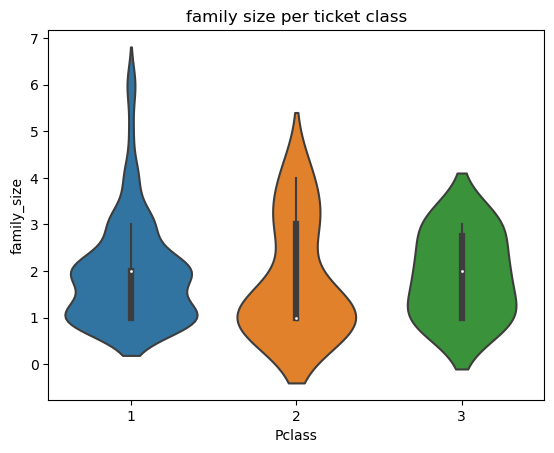

In [177]:
sns.violinplot(data=familysize_df, x='Pclass', y='family_size')
plt.title('family size per ticket class')
plt.show()

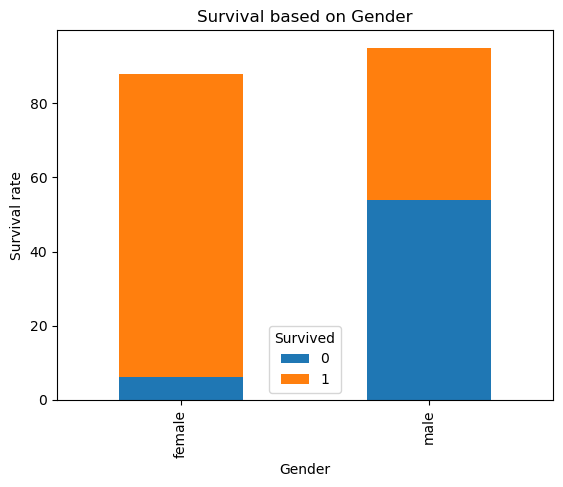

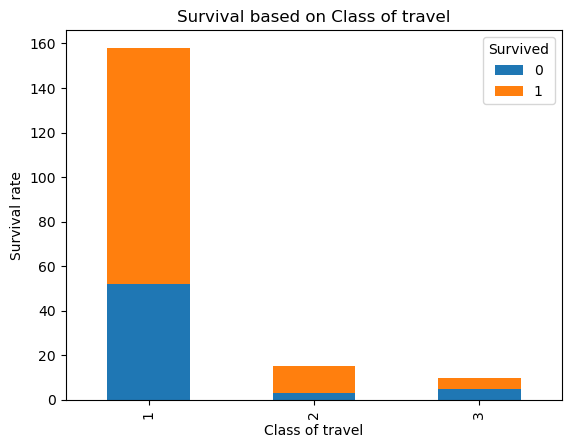

In [256]:
#A series of stacked bar charts to show the how survival differs for different gender and ticket class 

titanic_df_dropna.groupby(['Sex','Survived']).size().unstack().plot.bar(stacked=True)
plt.ylabel('Survival rate')
plt.xlabel('Gender')
plt.title('Survival based on Gender')
plt.show()

titanic_df_dropna.groupby(['Pclass','Survived']).size().unstack().plot.bar(stacked=True)
plt.ylabel('Survival rate')
plt.xlabel('Class of travel')
plt.title('Survival based on Class of travel')
plt.show()


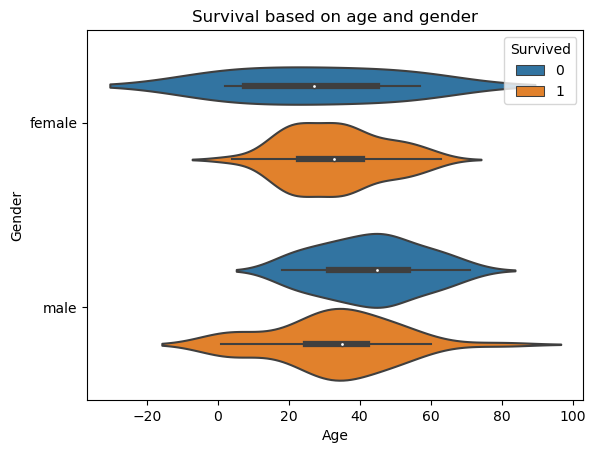

In [263]:
#A violin chart describing how survival related to age and gender

sns.violinplot(data=titanic_df_dropna, x='Age', y='Sex', hue='Survived')
plt.ylabel('Gender')
plt.title('Survival based on age and gender')
plt.show()

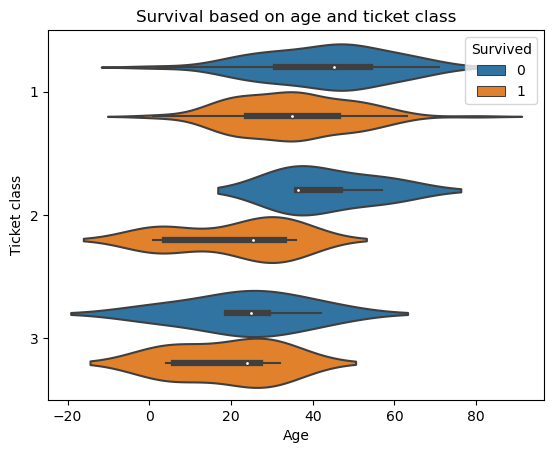

In [264]:
#A violin chart describing the survival rate related to age and ticket class

sns.violinplot(data=titanic_df_dropna, x='Age', y='Pclass', hue='Survived')
plt.ylabel('Ticket class')
plt.title('Survival based on age and ticket class')
plt.show()